### Business Scenario: Prepare rules for the (groceries.csv) data set.

In [1]:
#Importing necessary libraris

import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules

In [2]:
#Declaring empty list

groceries = []

In [3]:
# As the file is in transaction data, we will be reading data directly 

with open("C:\\Users\\Raja\\Downloads\\assignments\\association rule\\groceries.csv","r") as f:
    groceries = f.read()

In [4]:
# splitting the data into separate transactions using separator as "\n"

groceries = groceries.split("\n")
groceries_list = []

In [5]:
#itteration of elements in groceries list

for i in groceries:
    groceries_list.append(i.split(","))
  
all_groceries_list = []

In [6]:
#For i in groceries_list:
#All_groceries_list = all_groceries_list+i
       
all_groceries_list = [i for item in groceries_list for i in item]
from collections import Counter
item_frequencies = Counter(all_groceries_list)
item_frequencies = sorted(item_frequencies.items(),key = lambda x:x[1])

In [7]:
# Storing frequencies and items in separate variables 

frequencies = list(reversed([i[1] for i in item_frequencies]))
items = list(reversed([i[0] for i in item_frequencies]))

In [8]:
# barplot of top 10 

import matplotlib.pyplot as plt
plt.bar(height = frequencies[:11],x = list(range(0,11)),color='rgbkymc');plt.xticks(list(range(0,11),),items[:11]);plt.xlabel("items")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

In [9]:
# Creating Data Frame for the transactions data 
# Purpose of converting all list into Series object Coz to treat each list element as entire element not to separate 

groceries_series  = pd.DataFrame(pd.Series(groceries_list))
groceries_series = groceries_series.iloc[:9835,:] # removing the last empty transaction
groceries_series.columns = ["transactions"]

In [10]:
# creating a dummy columns for the each item in each transactions ... Using column names as item name

X = groceries_series['transactions'].str.join(sep='*').str.get_dummies(sep='*')
frequent_itemsets = apriori(X,min_support=0.005, max_len=3,use_colnames = True)
frequent_itemsets.shape

(989, 2)

Text(0, 0.5, 'support')

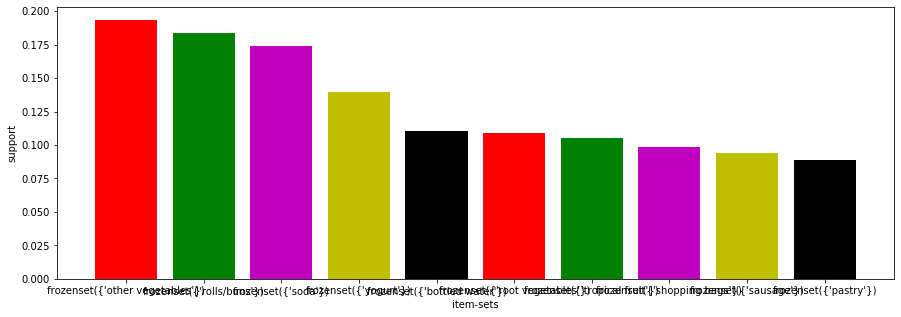

In [11]:
# Most Frequent item sets based on support 

frequent_itemsets.sort_values('support',ascending = False,inplace=True)
plt.figure(figsize=(15, 5))
plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk');plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.xlabel('item-sets');plt.ylabel('support')

In [12]:
#Declaring rules var for association rule

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.shape

(2700, 9)

In [13]:
#Fetching rules

rules.head(20)
rules.sort_values('lift',ascending = False,inplace=True)

In [14]:
#To eliminate Redudancy in Rules 

def to_list(i):
    return (sorted(list(i)))

In [15]:
#Sorting, listing and appending

ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)
ma_X = ma_X.apply(sorted)
rules_sets = list(ma_X)
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [16]:
# getting rules without any redudancy 

rules_no_redudancy  = rules.iloc[index_rules,:]

In [17]:
# Sorting them with respect to list and getting top 10 rules 

rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2558,(ham),(white bread),0.026029,0.042095,0.005084,0.195312,4.639851,0.003988,1.190407
2021,(whipped/sour cream),"(butter, other vegetables)",0.071683,0.020031,0.005796,0.080851,4.036397,0.004360,1.066171
1312,(root vegetables),(herbs),0.108998,0.016268,0.007016,0.064366,3.956477,0.005243,1.051406
2040,"(root vegetables, other vegetables)",(onions),0.047382,0.031012,0.005694,0.120172,3.875044,0.004225,1.101338
2207,(tropical fruit),"(citrus fruit, pip fruit)",0.104931,0.013828,0.005592,0.053295,3.854060,0.004141,1.041688
777,(berries),(whipped/sour cream),0.033249,0.071683,0.009049,0.272171,3.796886,0.006666,1.275461
1469,"(whipped/sour cream, whole milk)",(butter),0.032232,0.055414,0.006711,0.208202,3.757185,0.004925,1.192963
2435,(yogurt),"(curd, tropical fruit)",0.139502,0.010269,0.005287,0.037901,3.690645,0.003855,1.028720
1041,(root vegetables),"(other vegetables, beef)",0.108998,0.019725,0.007931,0.072761,3.688692,0.005781,1.057197
1871,"(domestic eggs, whole milk)",(butter),0.029995,0.055414,0.005999,0.200000,3.609174,0.004337,1.180732


-------------------------------------------------END-------------------------------------------------------------------

### Business Scenario: Prepare rules for the (book.csv) data set

In [18]:
from apyori import apriori

In [19]:
book = pd.read_csv('C:\\Users\\Raja\\Downloads\\assignments\\association rule\\book.csv', header=None)

In [20]:
book.head()

,0,1,2,3,4,5,6,7,8,9,10
0,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
1,0,1,0,1,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,1,0,1,0,0,0,0


In [21]:
book.shape

(2001, 11)

In [22]:
records = []
for i in range(0, 2000):
    records.append([str(book.values[i,j]) for j in range(0, 10)])

In [23]:
association_rules = apriori(records, min_support=0.005)
association_results = list(association_rules)

In [24]:
association_results

[RelationRecord(items=frozenset({'0'}), support=0.997, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'0'}), confidence=0.997, lift=1.0)]),
 RelationRecord(items=frozenset({'1'}), support=0.7605, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'1'}), confidence=0.7605, lift=1.0)]),
 RelationRecord(items=frozenset({'0', '1'}), support=0.758, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'0', '1'}), confidence=0.758, lift=1.0), OrderedStatistic(items_base=frozenset({'0'}), items_add=frozenset({'1'}), confidence=0.7602808425275828, lift=0.999711824493863), OrderedStatistic(items_base=frozenset({'1'}), items_add=frozenset({'0'}), confidence=0.9967126890203813, lift=0.999711824493863)])]

### Above result shows support, confidence & lift in short

--------------------------------------------------------End--------------------------------------------------------------